In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
df.drop(columns=['loan_id'],inplace=True)
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [5]:
df.duplicated().sum()

np.int64(0)

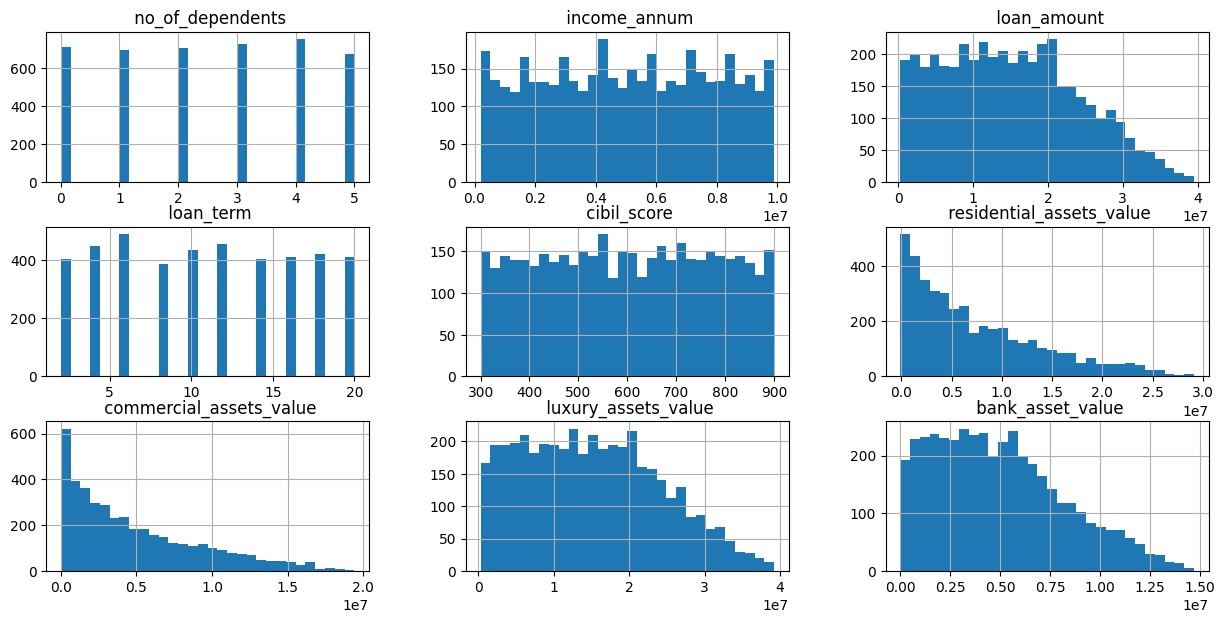

In [6]:
df.hist(bins=30,figsize=(15,7))
plt.show()

In [7]:
print (df[" education"].unique(),
df[" self_employed"].unique(),
df[" loan_status"].unique())


[' Graduate' ' Not Graduate'] [' No' ' Yes'] [' Approved' ' Rejected']


In [8]:
df.columns = df.columns.str.strip()

# Fix values inside the DataFrame
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Now safe to encode
df["education"] = df["education"].map({"Graduate": 1, "Not Graduate": 0})
df["self_employed"] = df["self_employed"].map({"Yes": 1, "No": 0})
df["loan_status"] = df["loan_status"].map({"Approved": 1, "Rejected": 0})
df.head()

C:\Users\youse\AppData\Local\Temp\ipykernel_26160\516222586.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


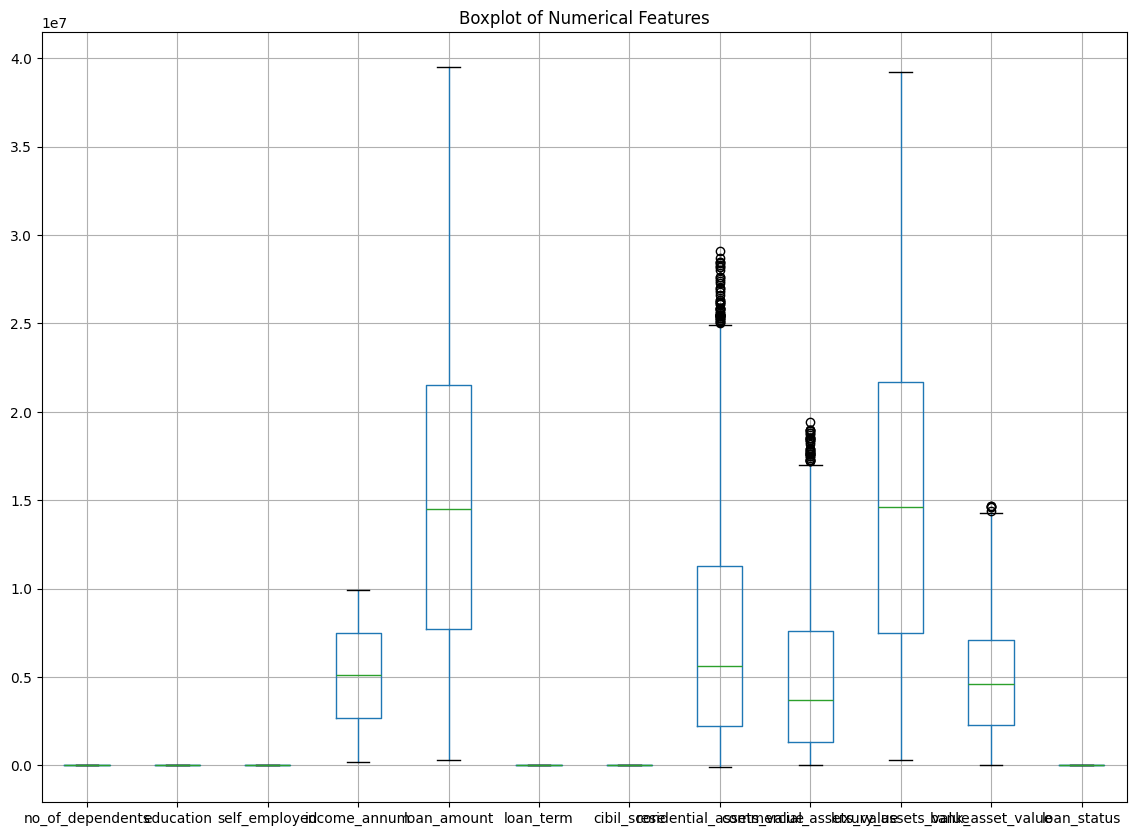

In [9]:
plt.figure(figsize=(14, 10))
df.boxplot(figsize=(14, 10))
plt.title("Boxplot of Numerical Features")
plt.show()

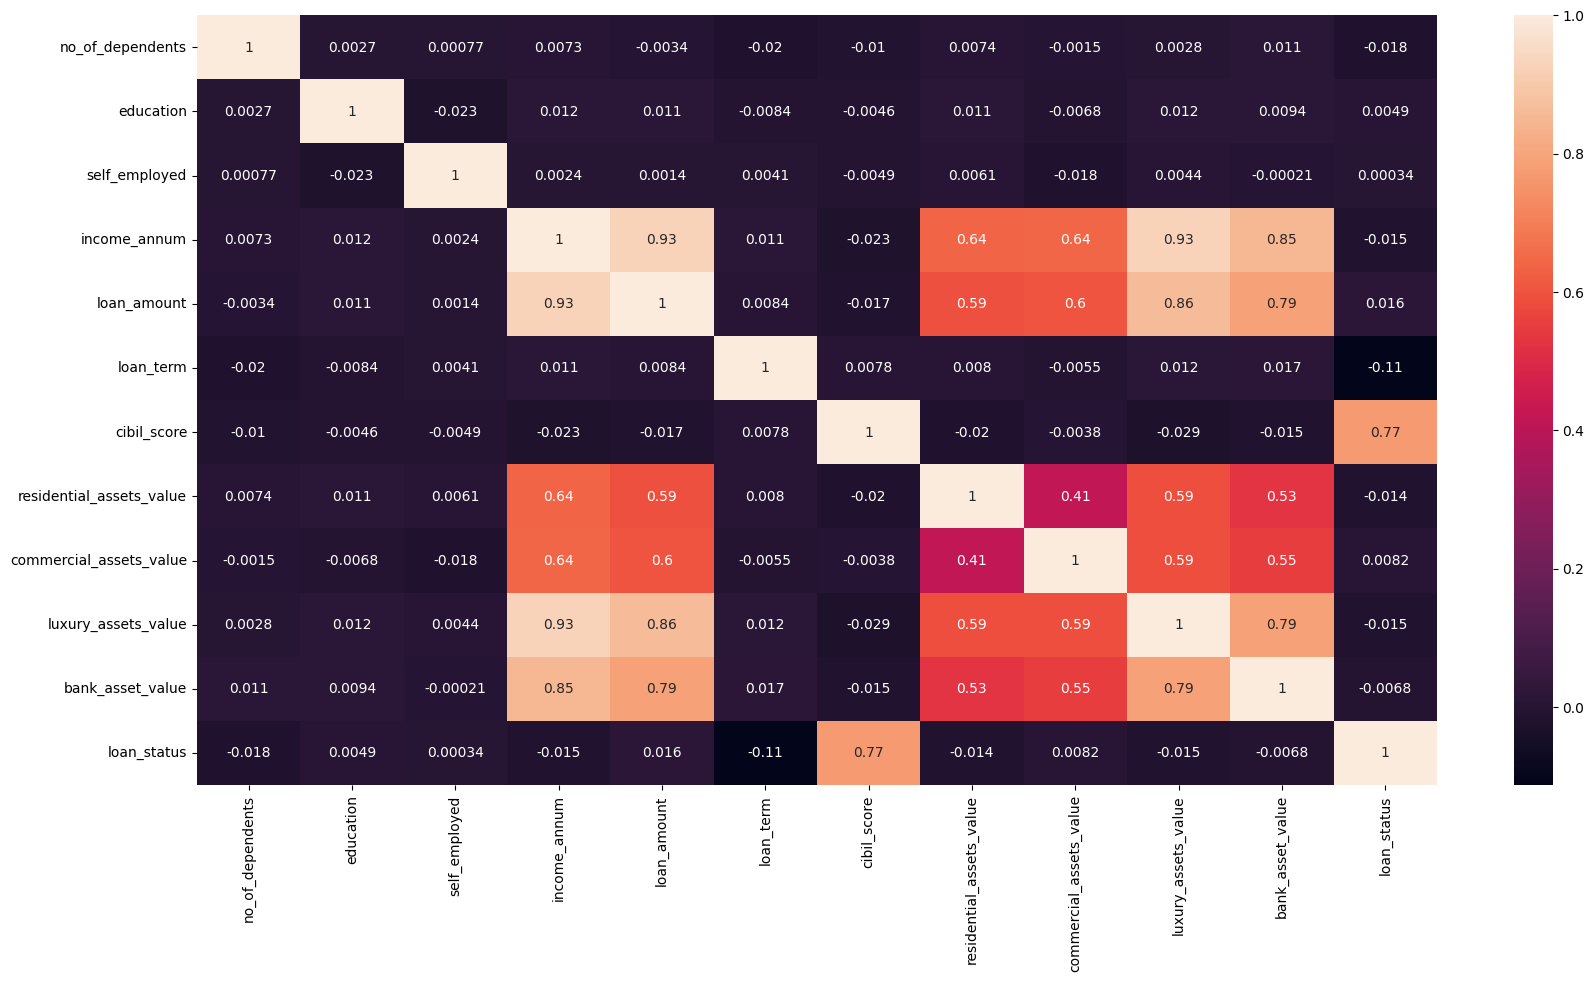

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [11]:
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [12]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier(random_state=42, class_weight="balanced")
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       323
           1       0.98      0.99      0.99       531

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

log_reg = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)
y_pred_proba_lr = log_reg.predict_proba(X_test)[:, 1]

print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.74      0.71      0.73       323
           1       0.83      0.85      0.84       531

    accuracy                           0.80       854
   macro avg       0.79      0.78      0.78       854
weighted avg       0.80      0.80      0.80       854



In [19]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    eval_metric="logloss",  
    use_label_encoder=False,
    scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]),  
    random_state=42
)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
y_pred_proba_xgb = xgb.predict_proba(X_test)[:, 1]

print("XGBoost Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       323
           1       0.98      0.98      0.98       531

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



c:\Users\youse\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:08:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [21]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42, class_weight="balanced", max_depth=5)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
y_pred_proba_dt = dt.predict_proba(X_test)[:, 1]

print("Decision Tree Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       323
           1       0.99      0.97      0.98       531

    accuracy                           0.98       854
   macro avg       0.97      0.98      0.97       854
weighted avg       0.98      0.98      0.98       854

